#### K均值聚类（手写）

In [1]:
# 导包
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.io

In [2]:
def loaddata():
    data = np.loadtxt('data/cluster_data.csv',delimiter=',')
    return data

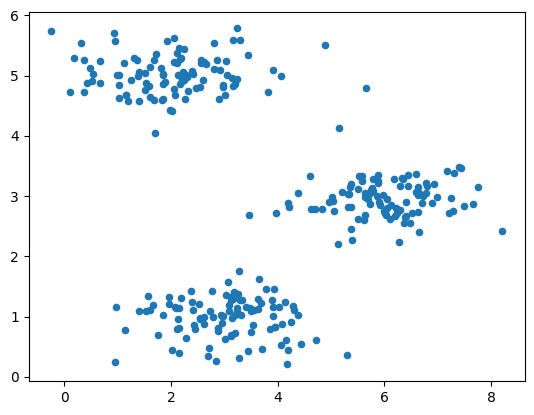

In [12]:
X = loaddata()
plt.scatter(X[:,0],X[:,1],s=20)

In [13]:
# 随机初始化质心
def kMeansInitCenters(X,k):
    # 从数据集X中随机选取k个作为质心
    index = np.random.randint(0,len(X),k)
    return X[index]

In [14]:
# 计算数据点到质心的距离，并判断该数据点属于哪个质心
def findClosestCenters(X,centers):
    idx = np.zeros(len(X)).reshape(X.shape[0],-1) # idx中的数据代表对应的样本属于哪个质心
    for i in range(len(X)):
        minDistance = float('inf') # 初始化最小距离为无穷大
        index = 0
        for k in range(len(centers)):
            # 使用欧几里得距离
            distance = np.sum(np.power(X[i]-centers[k],2))
            if distance<minDistance:
                minDistance = distance
                index = k
        idx[i] = index
    return idx

In [15]:
# 重新计算质心位置
def computeCenters(X,idx):
    k = set(np.ravel(idx).tolist()) # 当前聚类中心索引
    k = list(k)
    centers = np.ndarray((len(k),X.shape[1])) # 新的质心
    for i in range(len(k)):
        # 选择数据X中类别为k[i]的数据
        data = X[np.where(idx==k[i])[0]]
        # 重新计算聚类中心
        centers[i] = (np.sum(data,axis=0))/len(data)
    return centers

In [16]:
# 组合所有方法构成K-means算法
def k_means(X,k,max_iters): # 使用最大迭代次数控制终止条件
    initial_centers = kMeansInitCenters(X,k)
    for i in range(max_iters):
        if i==0:
            centers = initial_centers
        idx = findClosestCenters(X,centers)
        centers = computeCenters(X,idx)
    return idx, centers

In [19]:
idx,centers = k_means(X,3,8)
print(idx.T)
print(centers)

[[0. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
  2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1.
  2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
  2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
  2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0.]]
[[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.0005251

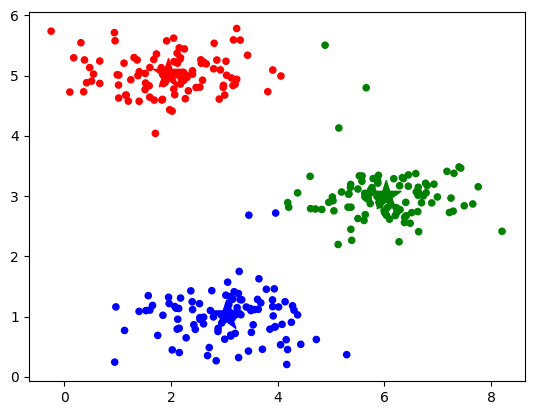

In [18]:
# 绘图
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.scatter(X[:, 0], X[:, 1], c=np.ravel(idx), cmap=cm_dark, s=20)
plt.scatter(centers[:,0],centers[:,1],c=np.arange(len(centers)),cmap=cm_dark,marker='*',s=500)